In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('../data/potato_prices_pvp.csv')

df['Year'] = df['Period'].str.extract(r'(\d{4})').astype(int)

df['Average Price (€/ton)'] = df['Price (€ / kg)'] * 1000

yearly_avg = df.groupby('Year')['Average Price (€/ton)'].mean().round(1).reset_index()

yearly_avg.to_csv("../data/pt_prices.csv", index = False)



In [4]:
df = pd.read_csv('../data/potatoPricesEU.csv')

columns_to_drop = ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency', 'Currency', 'currency', 'prod_veg', 'geo',"Observation value","OBS_FLAG","Observation status (Flag) V2 structure","CONF_STATUS","Confidentiality status (flag)", 'Vegetable product']
df = df.drop(columns=columns_to_drop)
df.rename(columns={'OBS_VALUE': 'Prices per 100 kg'}, inplace=True)
df.to_csv('../data/euPrices.csv', index = False)

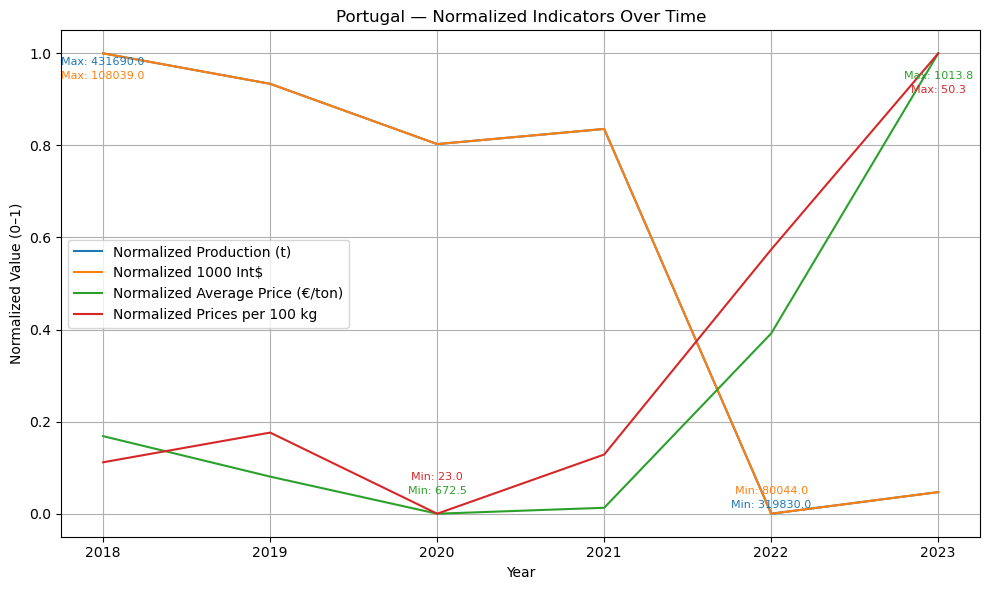

In [ ]:
df = pd.read_csv("../data/joined_output.csv")
dfEU = pd.read_csv('../data/euPrices.csv')

country = "Portugal"

df = df[(df['Area'] == country) & (df['Year'] >= 2018) & (df['Year'] <= 2023)]
df = df.sort_values('Year')

dfEU = dfEU[dfEU['Geopolitical entity (reporting)'] == country]
dfEU = dfEU[dfEU['TIME_PERIOD'] >= 2018]

columns_to_plot = ['Production (t)', '1000 Int$']
scaler = MinMaxScaler()

df_norm = df.copy()
df_norm[columns_to_plot] = scaler.fit_transform(df[columns_to_plot])

yearly_avg = yearly_avg[yearly_avg["Year"] <= 2023]
yearly_avg = yearly_avg[yearly_avg["Year"] >= 2018]
yearly_avg_norm = yearly_avg.copy()
yearly_avg_norm["Normalized Price"] = scaler.fit_transform(yearly_avg[["Average Price (€/ton)"]])

dfEU = dfEU[dfEU["TIME_PERIOD"] <= 2023]
dfEU_norm = dfEU.copy()
dfEU_norm["Normalized EU Price"] = scaler.fit_transform(dfEU[["Prices per 100 kg"]])
plt.figure(figsize=(10, 6))
scaler = MinMaxScaler()

columns_to_plot = ['Production (t)', '1000 Int$']
df_norm = df.copy()
df_norm[columns_to_plot] = scaler.fit_transform(df[columns_to_plot])

yearly_avg_norm = yearly_avg.copy()
yearly_avg_norm["Normalized Price"] = scaler.fit_transform(yearly_avg[["Average Price (€/ton)"]])

dfEU_norm = dfEU.copy()
dfEU_norm["Normalized EU Price"] = scaler.fit_transform(dfEU[["Prices per 100 kg"]])

offsets = {
    'Production (t)': -0.03,
    '1000 Int$': -0.06,
    'Average Price (€/ton)': -0.06,
    'Prices per 100 kg': -0.09
}

for col in columns_to_plot:
    line, = plt.plot(df['Year'], df_norm[col], label=f"Normalized {col}")
    color = line.get_color()

    min_idx = df[col].idxmin()
    max_idx = df[col].idxmax()

    min_year = df.loc[min_idx, 'Year']
    max_year = df.loc[max_idx, 'Year']
    min_val_real = df[col][min_idx]
    max_val_real = df[col][max_idx]
    min_val_norm = df_norm[col][min_idx]
    max_val_norm = df_norm[col][max_idx]

    off = offsets[col]
    plt.text(min_year, min_val_norm - off, f"Min: {min_val_real:.1f}", fontsize=8, ha='center', va='top', color=color)
    plt.text(max_year, max_val_norm + off, f"Max: {max_val_real:.1f}", fontsize=8, ha='center', va='bottom', color=color)

# Average
line, = plt.plot(yearly_avg_norm["Year"], yearly_avg_norm["Normalized Price"], label="Normalized Average Price (€/ton)")
color = line.get_color()
col = 'Average Price (€/ton)'

min_idx = yearly_avg["Average Price (€/ton)"].idxmin()
max_idx = yearly_avg["Average Price (€/ton)"].idxmax()
min_year = yearly_avg.loc[min_idx, 'Year']
max_year = yearly_avg.loc[max_idx, 'Year']
min_val = yearly_avg["Average Price (€/ton)"][min_idx]
max_val = yearly_avg["Average Price (€/ton)"][max_idx]
min_val_norm = yearly_avg_norm["Normalized Price"][min_idx]
max_val_norm = yearly_avg_norm["Normalized Price"][max_idx]
off = offsets[col]

plt.text(min_year, min_val_norm - off, f"Min: {min_val:.1f}", fontsize=8, ha='center', va='top', color=color)
plt.text(max_year, max_val_norm + off, f"Max: {max_val:.1f}", fontsize=8, ha='center', va='bottom', color=color)


line, = plt.plot(dfEU_norm["TIME_PERIOD"], dfEU_norm["Normalized EU Price"], label="Normalized Prices per 100 kg")
color = line.get_color()
col = 'Prices per 100 kg'

min_idx = dfEU["Prices per 100 kg"].idxmin()
max_idx = dfEU["Prices per 100 kg"].idxmax()
min_year = dfEU.loc[min_idx, 'TIME_PERIOD']
max_year = dfEU.loc[max_idx, 'TIME_PERIOD']
min_val = dfEU["Prices per 100 kg"][min_idx]
max_val = dfEU["Prices per 100 kg"][max_idx]
min_val_norm = dfEU_norm["Normalized EU Price"][min_idx]
max_val_norm = dfEU_norm["Normalized EU Price"][max_idx]
off = offsets[col]

plt.text(min_year, min_val_norm - off, f"Min: {min_val:.1f}", fontsize=8, ha='center', va='top', color=color)
plt.text(max_year, max_val_norm + off, f"Max: {max_val:.1f}", fontsize=8, ha='center', va='bottom', color=color)

# Plotting
plt.title(f"{country} — Normalized Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Normalized Value (0–1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()